<div style="display: flex; flex-direction: column; align-items: center; text-align: center; font-family: 'Avenir Next LT Pro', sans-serif; padding: 50px; background-color: #f4f4f4; border-radius: 12px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 50px; font-weight: bold; color: #222; margin-bottom: 10px;">Filologia Digital - Módulo V</h1>
    <h3 style="font-size: 30px; font-weight: bold; color: #555; max-width: 80%; line-height: 1.3;">
        Para além da edição: <span style="font-weight: normal; color: #666;">o digital na investigação linguística</span>
    </h3>
    <h4 style="font-size: 26px; font-weight: bold; color: #333; background-color: #e0e0e0; padding: 10px 20px; border-radius: 8px; margin-top: 25px;">Sessão 5 - Data Understanding</h4>
    <img src="https://filologiadigitalcl.wordpress.com/wp-content/uploads/2024/11/figure05.png?w=1024" 
         style="width: 80%; max-width: 600px; margin-top: 30px; border-radius: 10px; box-shadow: 0px 4px 12px rgba(0, 0, 0, 0.15);">
</div>

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #f4f4f4;
            color: #333;
            margin: 0;
            padding: 20px;
            line-height: 1.6;
        }
        ol {
            counter-reset: section;
            list-style: none;
            padding-left: 0;
        }
        /* First-level list */
        ol > li {
            counter-increment: section;
            margin-bottom: 10px;
            padding-left: 0;
        }
        ol > li::before {
            content: counters(section, ".") " ";
            font-weight: bold;
        }
        /* Second-level list */
        ol ol {
            counter-reset: subsection;
            padding-left: 20px;
            margin-top: 5px;
        }
        ol ol > li {
            counter-increment: subsection;
            margin-bottom: 5px;
            padding-left: 10px;
        }
        ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) " ";
            font-weight: bold;
        }
        /* Third-level list */
        ol ol ol {
            counter-reset: subsubsection;
            padding-left: 40px;
            margin-top: 5px;
        }
        ol ol ol > li {
            counter-increment: subsubsection;
            margin-bottom: 5px;
            padding-left: 10px;
            font-size: 0.9em; /* Make font size smaller */
            font-weight: normal; /* Remove bold styling */
        }
        ol ol ol > li::before {
            content: counters(section, ".") "." counter(subsection) "." counter(subsubsection) " ";
            font-weight: bold;
        }
        a {
            text-decoration: none;
            color: #007BFF;
            font-weight: bold;
        }
        a:hover {
            color: #0056b3;
        }
        footer {
            margin-top: 50px;
        }
    </style>
</head>
<body>

<h2><b>Índice</b></h2>
<ol>
    <li><a href="#1">Setup projeto</a></li>
    <li><a href="#2">Leitura dos Dados</a></li>
    <li><a href="#3">Visualização dos Dados</a></li>
    <li><a href="#4">Procura por termos</a></li>
    <ol>
    <li><a href="#4.1">Pesquisar por "RT"</a></li>
    <li><a href="#4.2">Pesquisar por "USER"</a></li>
    <li><a href="#4.3">Pesquisar por "URL"</a></li>
    <li><a href="#4.4">Pesquisar por "IMAGE"</a></li>
    <li><a href="#4.5">Pesquisar por palavras negativas</a></li>
    <li><a href="#4.6">Pesquisar por hashtags</a></li>
    <li><a href="#4.7">Pesquisar por menções</a></li>
    <li><a href="#4.8">Pesquisar por smiles</a></li>
    </ol>

    
    
</ol>

<footer></footer>

</body>
</html>

<a class='anchor' id='1'></a>

# **1. Setup projeto** 

#### Imports

In [1]:
import pandas as pd
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
import gzip
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from collections import Counter
from wordcloud import WordCloud

### Funções Importantes

Para uma correta análise e interpretação dos dados, procederemos a uma limpeza básica dos mesmos. Seguidamente, apresentamos a função desenvolvida para este efeito.

In [2]:
# Certificar que as stopwords estão disponíveis - faz download se necessário
nltk.download('stopwords')  # Download do pacote de stopwords do NLTK

# Inicializar o tokenizer e as stopwords
tokenizer = TreebankWordTokenizer()  # Tokenizador que preserva contrações e pontuação
stop_words = set(stopwords.words('english'))  # Converte stopwords para set (busca mais eficiente)

# Função de pré-processamento
def preprocess_text(text):
    text = text.lower()  # Normaliza o texto para minúsculas
    text = re.sub(r'http\S+|@\w+|#\w+', '', text)  # Remove URLs, menções e hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove pontuação (mantém apenas letras/números/espaços)
    tokens = tokenizer.tokenize(text)  # Divide o texto em tokens (palavras individuais)
    return [word for word in tokens if word not in stop_words]  # Filtra stopwords e retorna lista limpa

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diogo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Em projetos de grande escala, adota-se como boa prática a organização sistemática de arquivos em diretórios especializados. Como padrão, recomenda-se armazenar conjuntos de dados no diretório **Data**, garantindo assim uma estrutura lógica e eficiente.

In [3]:
# Caminho da pasta "root"
base_dir = Path(os.getcwd()).resolve()  # Ajuste se necessário, podes utilizar .parent para subir um nível
base_dir

WindowsPath('C:/Users/diogo/Desktop/Filologia_Digital-Modulo_V/Session4')

Com o diretório base definido, procedemos à criação do diretório da ``Data``

In [4]:
data_dir = base_dir / "Data"  # Diretório onde os dados serão armazenados
data_dir.mkdir(parents=True, exist_ok=True) # Cria o diretório se não existir

<a class='anchor' id='2'></a>

# **2. Leitura dos Dados** 

Os ficheiros encontram-se zipadas, devido a isso, é necessário extrai-los. Podemos utilizar a biblioteca **zipfile** para tal.

In [5]:
import zipfile
import os

# Abrir e extrair o conteúdo
with zipfile.ZipFile('TweetDataSet.zip', 'r') as zip_ref:
    zip_ref.extractall(data_dir)
    print("Ficheiros extraídos para:", data_dir)

Ficheiros extraídos para: C:\Users\diogo\Desktop\Filologia_Digital-Modulo_V\Session4\Data


In [6]:
df_train, df_test = pd.read_csv(data_dir / "Tweets_EN_sentiment_train.csv"), pd.read_csv(data_dir / "Tweets_EN_sentiment_test.csv")
df_train

,tweet,text,class
0,1229448571,"some count sheep, you count cats",pos
1,1230261573,We haven't been to Turning Stone in ages! Have...,pos
2,1228861415,What up,pos
3,1228489365,I'm good,pos
4,1229800235,"I know, wonder if USER is going to buy an apar...",pos
...,...,...,...
39931,1230130325,"LOL- F, please",pos
39932,1229250927,I wish I could do that too! But it ain't happe...,neg
39933,1228710021,I &lt;3 my boyfriend's family.,pos
39934,1228100681,404,neg


A coluna `tweet` não contém informação relevante para a nossa análise. Portanto, procederemos à sua eliminação do conjunto de dados.

In [7]:
del df_train['tweet']  # Remove a coluna 'tweet' do DataFrame de treino
del df_test['tweet']  # Remove a coluna 'tweet' do DataFrame de teste
df_train

,text,class
0,"some count sheep, you count cats",pos
1,We haven't been to Turning Stone in ages! Have...,pos
2,What up,pos
3,I'm good,pos
4,"I know, wonder if USER is going to buy an apar...",pos
...,...,...
39931,"LOL- F, please",pos
39932,I wish I could do that too! But it ain't happe...,neg
39933,I &lt;3 my boyfriend's family.,pos
39934,404,neg


Após a leitura dos conjuntos de dados, aplicaremos as funções de pré-processamento para analisar as transformações realizadas.

In [8]:
# Aplicar pré-processamento
df_train['class'] = df_train['class'].str.lower()
df_train['tokens'] = df_train['text'].astype(str).apply(preprocess_text)
df_test['tokens'] = df_test['text'].astype(str).apply(preprocess_text)

# Remover linhas sem tokens
df_train = df_train[df_train['tokens'].apply(len) > 0]
df_test = df_test[df_test['tokens'].apply(len) > 0]

In [9]:
df_train

,text,class,tokens
0,"some count sheep, you count cats",pos,"[count, sheep, count, cats]"
1,We haven't been to Turning Stone in ages! Have...,pos,"[havent, turning, stone, ages, great, time]"
3,I'm good,pos,"[im, good]"
4,"I know, wonder if USER is going to buy an apar...",pos,"[know, wonder, user, going, buy, apartment, he..."
5,ok cool,pos,"[ok, cool]"
...,...,...,...
39931,"LOL- F, please",pos,"[lol, f, please]"
39932,I wish I could do that too! But it ain't happe...,neg,"[wish, could, aint, happening]"
39933,I &lt;3 my boyfriend's family.,pos,"[lt3, boyfriends, family]"
39934,404,neg,[404]


<a class='anchor' id='3'></a>

# **3. Visualização dos Dados** 

### Equilibrio das classes

C:\Users\diogo\AppData\Local\Temp\ipykernel_20428\190080596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['dataset'] = 'Train'
C:\Users\diogo\AppData\Local\Temp\ipykernel_20428\190080596.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['dataset'], inplace=True)


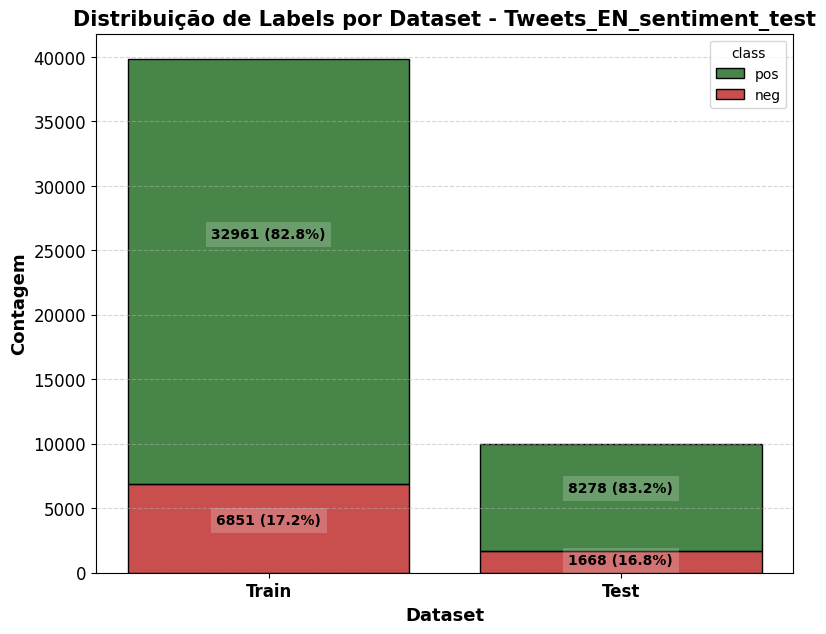

In [10]:
# Adicionar uma coluna que indica se é treino ou teste
df_train['dataset'] = 'Train'
df_test['dataset'] = 'Test'

# Concatenar os dois DataFrames
df = pd.concat([df_train, df_test])

# Contagem de classes por dataset
counts = df.groupby(['dataset', 'class']).size().reset_index(name='count')

# Calcular percentagens dentro de cada conjunto (Train/Test)
counts['percent'] = counts.groupby('dataset')['count'].transform(lambda x: x / x.sum() * 100)

# Criar o gráfico empilhado
plt.figure(figsize=(9, 7))
ax = sns.histplot(
    data=df, 
    x='dataset', 
    hue='class', 
    multiple='stack', 
    shrink=0.8, 
    discrete=True, 
    palette={"pos":"#0a5c0a", "neg":"#b81414"},  # Verde e Vermelho
    edgecolor='black'
)

# Adicionar anotações com as percentagens no centro de cada barra
for dataset in counts['dataset'].unique():
    dataset_data = counts[counts['dataset'] == dataset]
    total_height = 0  

    for _, row in dataset_data.iterrows():
        label = row['class']
        count = row['count']
        percent = row['percent']

        # Encontrar a posição X correta
        x_pos = 0 if dataset == 'Train' else 1

        # Calcular a posição Y para o centro da barra atual
        y_pos = total_height + (count / 1.7)
        total_height += count  

        # Adicionar a anotação no centro da barra correspondente
        ax.text(x_pos, y_pos, f'{count} ({percent:.1f}%)', ha='center', va='center', 
                fontsize=10, color='black', fontweight='bold', bbox=dict(facecolor='white', alpha=0.2, edgecolor='none'))

# Personalizar o gráfico
plt.xlabel('Dataset', fontsize=13, fontweight='bold')
plt.ylabel('Contagem', fontsize=13, fontweight='bold')
plt.title('Distribuição de Labels por Dataset - Tweets_EN_sentiment_test', fontsize=15, fontweight='bold')

# Melhorar a grade e os eixos
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Remover a coluna temporária
df_train.drop(columns=['dataset'], inplace=True)
df_test.drop(columns=['dataset'], inplace=True)
del df

plt.show()

### Palavras mais referidas em cada classe

In [11]:
df_train

,text,class,tokens
0,"some count sheep, you count cats",pos,"[count, sheep, count, cats]"
1,We haven't been to Turning Stone in ages! Have...,pos,"[havent, turning, stone, ages, great, time]"
3,I'm good,pos,"[im, good]"
4,"I know, wonder if USER is going to buy an apar...",pos,"[know, wonder, user, going, buy, apartment, he..."
5,ok cool,pos,"[ok, cool]"
...,...,...,...
39931,"LOL- F, please",pos,"[lol, f, please]"
39932,I wish I could do that too! But it ain't happe...,neg,"[wish, could, aint, happening]"
39933,I &lt;3 my boyfriend's family.,pos,"[lt3, boyfriends, family]"
39934,404,neg,[404]


C:\Users\diogo\AppData\Local\Temp\ipykernel_20428\2481344956.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


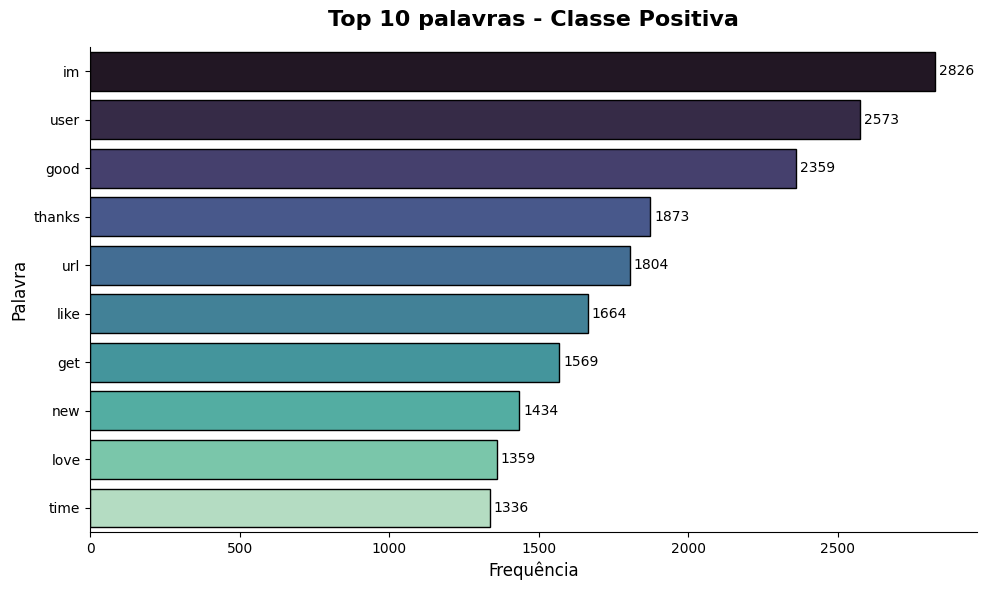

C:\Users\diogo\AppData\Local\Temp\ipykernel_20428\2481344956.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


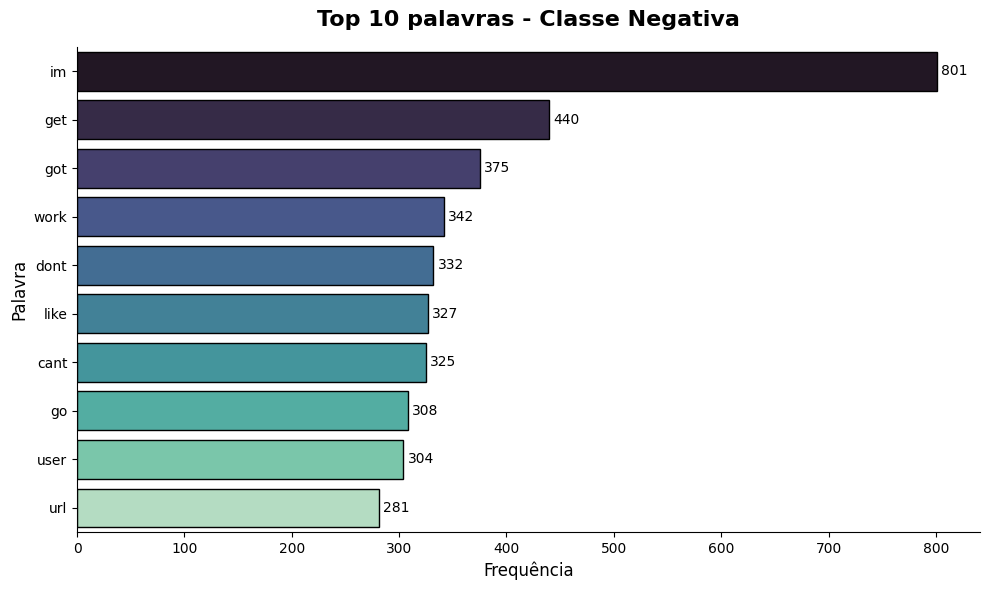

Exemplo de texto original: some count sheep, you count cats 
Tokens extraídos: ['count', 'sheep', 'count', 'cats']


In [12]:
# Separar palavras por classe
positive_words = [word for tokens in df_train[df_train['class'] == 'pos']['tokens'] for word in tokens]
negative_words = [word for tokens in df_train[df_train['class'] == 'neg']['tokens'] for word in tokens]

# Verificação
if not positive_words or not negative_words:
    print("Erro: Nenhuma palavra encontrada após pré-processamento.")
else:
    top10_pos = Counter(positive_words).most_common(10)
    top10_neg = Counter(negative_words).most_common(10)

    def plot_top_words(top_words, title, color_palette='mako'):
        df_top = pd.DataFrame(top_words, columns=['Palavra', 'Frequência'])
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(
            data=df_top,
            x='Frequência',
            y='Palavra',
            palette=color_palette,
            edgecolor='black'
        )

        # Estilo do gráfico
        plt.title(title, fontsize=16, weight='bold', pad=15)
        plt.xlabel("Frequência", fontsize=12)
        plt.ylabel("Palavra", fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)

        # Mostrar valor no final de cada barra
        for i in ax.containers:
            ax.bar_label(i, fmt='%d', fontsize=10, padding=3)

        sns.despine()
        plt.tight_layout()
        plt.show()

    plot_top_words(top10_pos, "Top 10 palavras - Classe Positiva")
    plot_top_words(top10_neg, "Top 10 palavras - Classe Negativa")

# Ver exemplo
print("Exemplo de texto original:", df_train['text'].iloc[0])
print("Tokens extraídos:", df_train['tokens'].iloc[0])

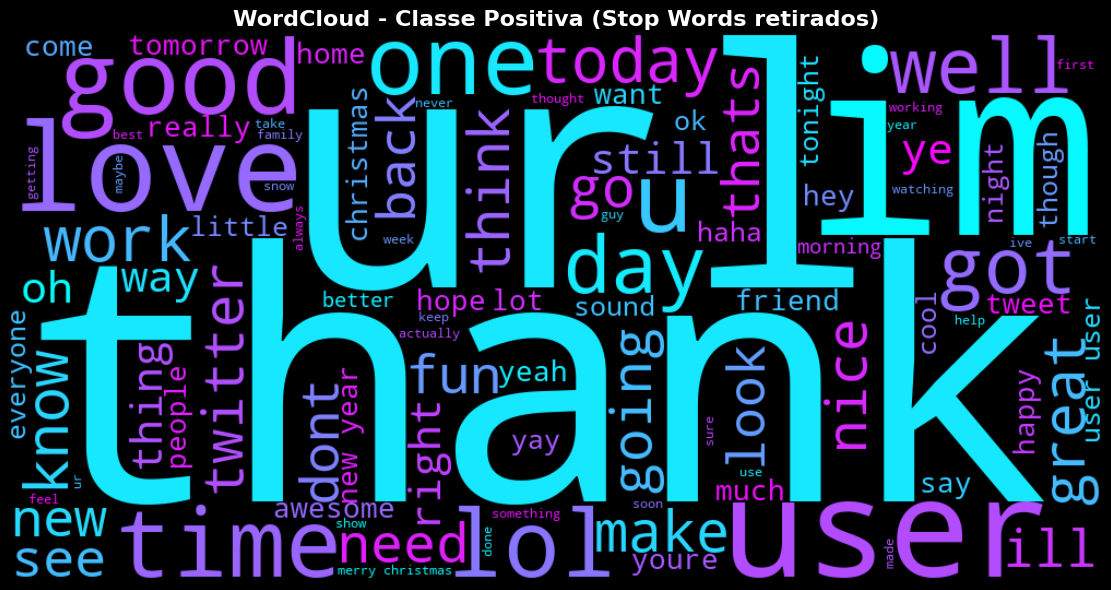

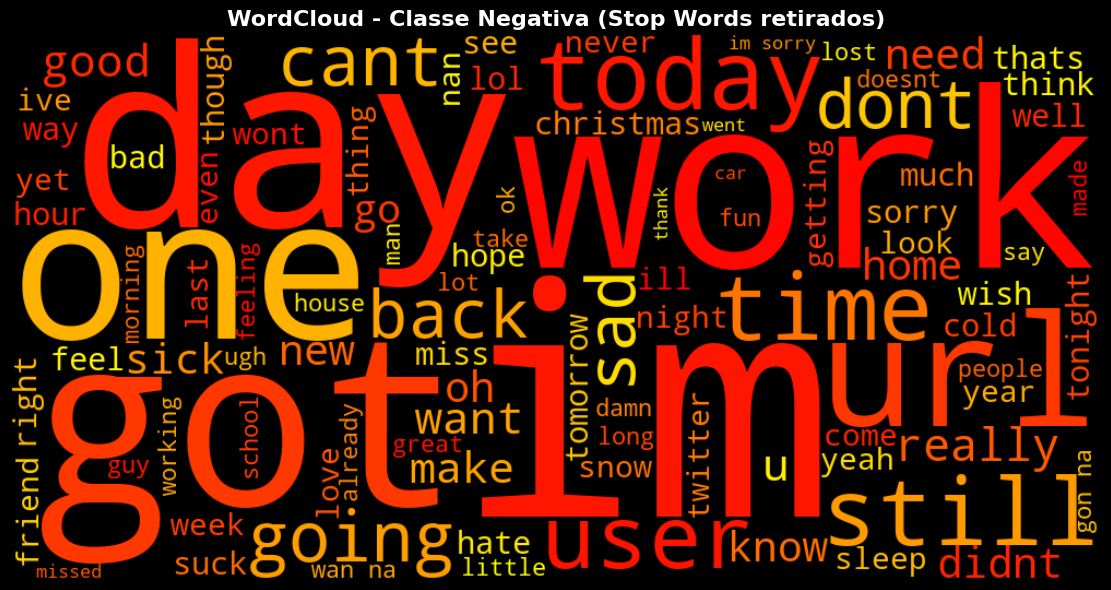

In [13]:
# Remover linhas sem tokens
df_train = df_train[df_train['tokens'].apply(len) > 0]

# Garantir que os classes estão todos em minúsculas
df_train['class'] = df_train['class'].str.lower()

# Separar palavras por classe
positive_words = [word for tokens in df_train[df_train['class'] == 'pos']['tokens'] for word in tokens]
negative_words = [word for tokens in df_train[df_train['class'] == 'neg']['tokens'] for word in tokens]

# Estilo geral escuro
plt.style.use('dark_background')

# Função para gerar wordcloud com fundo preto
def gerar_wordcloud(palavras, titulo, classe):
    texto = ' '.join(palavras)
    
    # Colormap consoante a classe
    colormap = {
        'positive': 'cool',     # tons frios e positivos
        'negative': 'autumn'    # tons quentes e intensos
    }.get(classe, 'gray')

    wc = WordCloud(
        width=1000,
        height=500,
        background_color='black',
        colormap=colormap,
        contour_color='white',
        contour_width=1.0,
        max_words=100,
        random_state=42
    ).generate(texto)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo, fontsize=16, fontweight='bold', color='white')
    plt.tight_layout()
    plt.show()

# Gráfico de barras horizontal com tema escuro
def plot_top_words(top_words, title):
    df_top = pd.DataFrame(top_words, columns=["Palavra", "Frequência"])

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df_top,
        y="Palavra",
        x="Frequência",
        palette="flare"
    )
    plt.title(title, fontsize=16, fontweight='bold', color='white')
    plt.xlabel("Frequência", fontsize=12, color='white')
    plt.ylabel("Palavra", fontsize=12, color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Verificar se há palavras suficientes
if not positive_words or not negative_words:
    print("Erro: Nenhuma palavra encontrada após pré-processamento.")
else:
    # Mostrar wordclouds
    gerar_wordcloud(positive_words, "WordCloud - Classe Positiva (Stop Words retirados)", "positive")
    gerar_wordcloud(negative_words, "WordCloud - Classe Negativa (Stop Words retirados)", "negative")


### **Exercicio:** Faz um gráfico para visualizar os nulos em cada coluna da tabela

<a class='anchor' id='4'></a>

# **4. Procura por termos** 

Para esta fase vamos tentar ver termos e ocorrências de palavras que talvez não façam tanto sentido.

Começamos por ver os "`RT USER`" e os "`URL`" que vimos no artigo: https://www.sciencedirect.com/science/article/pii/B9780128245361000150.

<a class='anchor' id='4.1'></a>

## **4.1 Pesquisar por "RT"** 

In [14]:
df_train['tokens']
palavras_procuradas = {'rt'}
df_filtrado = df_train[df_train['tokens'].apply(lambda x: any(p in x for p in palavras_procuradas))]
df_filtrado

,text,class,tokens
113,RT USER People who retweet my tweets are aweso...,pos,"[rt, user, people, retweet, tweets, awesome, t..."
584,RT USER USER USER Reuters coverage is excellen...,pos,"[rt, user, user, user, reuters, coverage, exce..."
1205,RT USER 50+ Websites Submitted by the Designer...,pos,"[rt, user, 50, websites, submitted, designers,..."
1584,RT USER WP 2.7 is amazing. It just finished wa...,pos,"[rt, user, wp, 27, amazing, finished, washing,..."
1742,"RT: USER USER Santa brought me a recession, a ...",pos,"[rt, user, user, santa, brought, recession, de..."
...,...,...,...
38793,RT USER Yoga for Health & Well BeingThis artic...,neg,"[rt, user, yoga, health, well, beingthis, arti..."
39257,Thanks for the RT,pos,"[thanks, rt]"
39397,Check out SmugMug.com ! RT USER USER Try resiz...,pos,"[check, smugmugcom, rt, user, user, try, resiz..."
39465,RT USER RIM buys Vancouver's Chalk Media for $...,pos,"[rt, user, rim, buys, vancouvers, chalk, media..."


Conseguimos ver casos como "thanks for the RT" que não aparece no início do texto, pelo que teremos de ter cuidado ao tratar isto.

In [15]:
df_train[df_train['text'].str.contains('thanks for the RT', case=False, na=False)]

,text,class,tokens
6907,Thanks for the RT Jack! Happy New Year!,pos,"[thanks, rt, jack, happy, new, year]"
7665,"Heh, thanks for the RT - didn't even ask for i...",pos,"[heh, thanks, rt, didnt, even, ask, time]"
7883,"Hey girlie, thanks for the RT Have a great ni...",pos,"[hey, girlie, thanks, rt, great, night]"
8143,Thanks for the RT,pos,"[thanks, rt]"
10084,thanks for the RT,pos,"[thanks, rt]"
19904,Thanks for the RT. Now if only ALL politicians...,pos,"[thanks, rt, politicians, would, understand, s..."
20796,thanks for the rt hon. You are the best!,pos,"[thanks, rt, hon, best]"
28284,"Thanks for the RT, Brian.",pos,"[thanks, rt, brian]"
30568,thanks for the RT,pos,"[thanks, rt]"
30651,Thanks for the RT rose.,pos,"[thanks, rt, rose]"


Vamos ver os que começam por RT e seguem-se um User (que parece estar anonimizado).

In [16]:
df_train[df_train['text'].str.contains('RT USER', case=False, na=False)]
df_test[df_test['text'].str.contains('RT USER', case=False, na=False)]

# text starts with RT
df_test[df_test['text'].str.startswith('RT', na=False)]

,text,class,tokens
541,"RT USER in email, the UNSUBSCRIBE link should ...",pos,"[rt, user, email, unsubscribe, link, right, to..."
760,RT True pet love is putting on extra layers so...,pos,"[rt, true, pet, love, putting, extra, layers, ..."
1126,"RT USER Oooh, looks like Frugalous is giving a...",pos,"[rt, user, oooh, looks, like, frugalous, givin..."
1647,RTip$1 USER USER that USER deserves more than ...,pos,"[rtip1, user, user, user, deserves, buck]"
1798,RT USER New blog post: The Mom Song - Not Unli...,pos,"[rt, user, new, blog, post, mom, song, unlike,..."
1833,RT USER How about following me? Locked in some...,pos,"[rt, user, following, locked, sort, limit, im,..."
2074,RT: I am following you. Will you follow me bac...,pos,"[rt, following, follow, back, gbu]"
2264,RT USER USER retweet as nec...it ur proof URL...,pos,"[rt, user, user, retweet, necit, ur, proof, ur..."
2285,"RT USER USER Start using hash tags please, so ...",pos,"[rt, user, user, start, using, hash, tags, ple..."
2400,RT ... Merry Christmas everyone! Happy birthda...,pos,"[rt, merry, christmas, everyone, happy, birthd..."


A decisão vai ser retirar os que começam por:
- RT
- RT:
- RT USER
- RT: USER
- RT USER USER
- RT: USER USER USER
- (...)

<a class='anchor' id='4.2'></a>

## **4.2 Pesquisar por "USER"** 

In [17]:
df_train['tokens']
palavras_procuradas = {'user'}
df_filtrado = df_train[df_train['tokens'].apply(lambda x: any(p in x for p in palavras_procuradas))]
df_filtrado

,text,class,tokens
4,"I know, wonder if USER is going to buy an apar...",pos,"[know, wonder, user, going, buy, apartment, he..."
6,USER Facebook is down. It's not you guys,pos,"[user, facebook, guys]"
10,I have to agree with USER Design...I have Vist...,pos,"[agree, user, designi, vistathe, hated, alland..."
11,lining at the bottom of your bird cage is a go...,pos,"[lining, bottom, bird, cage, good, one, user, ..."
20,Tell the weather guy up there to stop predicti...,pos,"[tell, weather, guy, stop, predicting, snow, w..."
...,...,...,...
39887,Morning peeps. Oh gawd i wanna die; im so tire...,pos,"[morning, peeps, oh, gawd, wan, na, die, im, t..."
39898,"christmas party, afterparty USER bremer",pos,"[christmas, party, afterparty, user, bremer]"
39902,working on USER and catching up on e-mails and...,pos,"[working, user, catching, emails, paperwork, g..."
39912,USER Er is inderdaad iets tussen ons... ongeve...,pos,"[user, er, inderdaad, iets, tussen, ons, ongev..."


Parece que está a referenciar uma pessoa que não tem o nome lá (por exemplo @USER). Decidimos não retirar a palavra USER, pois pode ter relevância no contexto do tweet. 

E.g.: 
- "Good idea! I don't see USER online much! I'll send him a msg"
- ""USER you can count on USER and 'me' " :P"


Vamos ver só no conjunto de teste (apenas porque é mais pequeno para analisar certos casos).

In [18]:
df_test[df_test['text'].str.contains('user', case=True, na=False)]

,text,class,tokens
658,Just an FYI that I changed my username from Kb...,pos,"[fyi, changed, username, kbug44, kristibug, ma..."
971,I'm having a problem with users not able to ad...,neg,"[im, problem, users, able, add, trusted, sites..."
1171,I'm not calling you a rube. UR just one of tho...,pos,"[im, calling, rube, ur, one, 3, computer, user..."
3310,the username is temporarily. I just wanted to ...,pos,"[username, temporarily, wanted, lil]"
3465,"I got it sorted, I wuz doin' it wrong - I'm an...",pos,"[got, sorted, wuz, doin, wrong, im, active, li..."
3994,I nominate USER for a Shorty Award in #apps be...,pos,"[nominate, user, shorty, award, provide, excel..."
7078,"-Thanks, Mari about the user's name. Tons of ...",pos,"[thanks, mari, users, name, tons, hugs, kisses]"
7118,"i changed my twitter username,, you might upda...",pos,"[changed, twitter, username, might, update, ha..."
7367,Got a new icon on YouTube... thanks to user Cr...,pos,"[got, new, icon, youtube, thanks, user, crazyh..."
8405,: Man accused of assaulting girlfriend with ho...,pos,"[man, accused, assaulting, girlfriend, hot, sw..."


Há casos que tirar em minúscula faz sentido, mas outros não.

E.g.:
- : Man accused of assaulting girlfriend with hot sweet potato pie?? He must be a facebook user 
- I'm not calling you a rube. UR just one of those 3% of all computer users who likes the shiny. Let's fight! 

<a class='anchor' id='4.3'></a>

## **4.3 Pesquisar por "URL"** 

In [19]:
df_train['tokens']
palavras_procuradas = {'url'}
df_filtrado = df_train[df_train['tokens'].apply(lambda x: any(p in x for p in palavras_procuradas))]
df_filtrado

,text,class,tokens
12,"URL - ""Only buy for your Secret Santa."" ... Jo...",pos,"[url, buy, secret, santa, joyous, fail]"
84,URL\n\ntry that out,pos,"[url, try]"
85,just got off the phone with one of the guys wh...,pos,"[got, phone, one, guys, founded, url, super, c..."
103,"time to invest in gold, guns, and a shack in t...",neg,"[time, invest, gold, guns, shack, woods, url, ..."
131,is laughing at Symantec's 12 days of Christmas...,pos,"[laughing, symantecs, 12, days, christmas, spa..."
...,...,...,...
39826,This kid is creative! We need him developing f...,pos,"[kid, creative, need, developing, best, buy, b..."
39857,Observer &gt;&gt; Pro Bowl should love Panther...,neg,"[observer, gtgt, pro, bowl, love, panthersby, ..."
39886,video intro of us up at URL,pos,"[video, intro, us, url]"
39903,woohoo. 5 posts in 1 wk. URL this one's a char...,pos,"[woohoo, 5, posts, 1, wk, url, ones, character..."


O URL na maioria dos casos parece ser um link que não nos dará muito contexto porque é algo externo que não temos acesso. Talvez tirar seja a solução mais acertada.

<a class='anchor' id='4.4'></a>

## **4.4 Pesquisar por "IMAGE"** 

Agora vamos verificar se existem IMAGE, tal como vimos no artigo mencionado anteriormente. 

In [20]:
df_train['tokens']
palavras_procuradas = {'image'}
df_filtrado = df_train[df_train['tokens'].apply(lambda x: any(p in x for p in palavras_procuradas))]
df_filtrado

,text,class,tokens
2118,Now there's an amusing image,pos,"[theres, amusing, image]"
7906,I'm making progress; I know have a profile image,pos,"[im, making, progress, know, profile, image]"
9001,"haha, i was enjoying the image of the Olympic ...",pos,"[haha, enjoying, image, olympic, mills, buildi..."
10927,Great image! Now get some photos printed and d...,pos,"[great, image, get, photos, printed, displayed..."
16659,"image worked like a breeze, enjoying the appli...",pos,"[image, worked, like, breeze, enjoying, applic..."
17236,ok found it!! it's a menu in the normal inspec...,pos,"[ok, found, menu, normal, inspector, yay, imag..."
17397,if i'm not wrong.. Alt is when image can't be ...,pos,"[im, wrong, alt, image, cant, displayed, toolt..."
18828,Hard to say - I'm an apple bod for computing a...,pos,"[hard, say, im, apple, bod, computing, phone, ..."
20510,I still have to install Photoshop on my new HD...,pos,"[still, install, photoshop, new, hd, image]"
25478,hahahahaha! i had an image of you walking quie...,neg,"[hahahahaha, image, walking, quietly, circles,..."


O IMAGE não aparece como texto como o artigo mencionou, por isso, permanecerá igual.

<a class='anchor' id='4.5'></a>

## **4.5 Pesquisar por palavras negativas** 

Normalmente há problemas que acontecem a fazer com tokens.

In [21]:
palavras_negativas = {'not', 'no', "never", "n't", "none", "cannot", ", but", # but com virgula normalmente é uma negação
                      "cant", "don't", "isn't", "wasn't", "aren't", "hasn't",
                      "haven't", "hadn't", "won't", "wouldn't", "shouldn't", "couldn't"}

for palavra in palavras_negativas:
    count = df_train['tokens'].apply(lambda x: palavra in x).sum()
    print(f"A palavra '{palavra}' aparece em {count} linhas.")

A palavra 'wasn't' aparece em 0 linhas.
A palavra 'never' aparece em 428 linhas.
A palavra 'shouldn't' aparece em 0 linhas.
A palavra 'won't' aparece em 0 linhas.
A palavra 'don't' aparece em 0 linhas.
A palavra 'wouldn't' aparece em 0 linhas.
A palavra 'no' aparece em 0 linhas.
A palavra 'hadn't' aparece em 0 linhas.
A palavra 'not' aparece em 0 linhas.
A palavra ', but' aparece em 0 linhas.
A palavra 'none' aparece em 25 linhas.
A palavra 'isn't' aparece em 0 linhas.
A palavra 'couldn't' aparece em 0 linhas.
A palavra 'aren't' aparece em 0 linhas.
A palavra 'cannot' aparece em 0 linhas.
A palavra 'n't' aparece em 0 linhas.
A palavra 'haven't' aparece em 0 linhas.
A palavra 'hasn't' aparece em 0 linhas.
A palavra 'cant' aparece em 859 linhas.


In [22]:
palavras_negativas = {'not', 'no', "never", "n't", "none", "cannot", ", but", # but com virgula normalmente é uma negação
                      "cant", "don't", "isn't", "wasn't", "aren't", "hasn't",
                      "haven't", "hadn't", "won't", "wouldn't", "shouldn't", "couldn't"}


for palavra in palavras_negativas:
    count = df_train['text'].str.contains(rf'\b{palavra}\b', case=False, na=False).sum()
    print(f"A palavra '{palavra}' aparece em {count} linhas no texto.")

A palavra 'wasn't' aparece em 126 linhas no texto.
A palavra 'never' aparece em 436 linhas no texto.
A palavra 'shouldn't' aparece em 32 linhas no texto.
A palavra 'won't' aparece em 194 linhas no texto.
A palavra 'don't' aparece em 1105 linhas no texto.
A palavra 'wouldn't' aparece em 99 linhas no texto.
A palavra 'no' aparece em 1548 linhas no texto.
A palavra 'hadn't' aparece em 21 linhas no texto.
A palavra 'not' aparece em 2379 linhas no texto.
A palavra ', but' aparece em 915 linhas no texto.
A palavra 'none' aparece em 25 linhas no texto.
A palavra 'isn't' aparece em 181 linhas no texto.
A palavra 'couldn't' aparece em 109 linhas no texto.
A palavra 'aren't' aparece em 79 linhas no texto.
A palavra 'cannot' aparece em 36 linhas no texto.
A palavra 'n't' aparece em 1 linhas no texto.
A palavra 'haven't' aparece em 204 linhas no texto.
A palavra 'hasn't' aparece em 37 linhas no texto.
A palavra 'cant' aparece em 140 linhas no texto.


<a class='anchor' id='4.6'></a>

## **4.6 Pesquisar por hashtags** 

Por se tratar de uma rede social, é necessário pesquisar pela existência de hashtags.

In [23]:
df_train[df_train['text'].str.contains('#', case=False, na=False)]

,text,class,tokens
186,#overbooked flight...the reason is easy. Ghos...,pos,"[flightthe, reason, easy, ghosts]"
259,If anyone out there wants to know more about #...,pos,"[anyone, wants, know, give, shout, tweet, what..."
300,RETWEET Check out #ActionsTalk #22 featuring C...,pos,"[retweet, check, featuring, cd, vann, com, pls..."
318,I nominate USER for a Shorty Award in #tech be...,pos,"[nominate, user, shorty, award, wordpress, mem..."
510,You're a quick draw. Your USER #13 beat my #2 ...,pos,"[youre, quick, draw, user, beat, seconds]"
...,...,...,...
39642,#flylady Did some WiiFit w/ DKs Family Fun Mov...,pos,"[wiifit, w, dks, family, fun, movement, right,..."
39725,#flylady Today is day 3 of quitting smoking an...,pos,"[today, day, 3, quitting, smoking, feeling, bad]"
39851,My Page Rank according to Google. It's a very...,pos,"[page, rank, according, google, good, thing]"
39871,"Re: Yahoo slide #12: Don't ""own""...""PWN the e...",neg,"[yahoo, slide, dont, ownpwn, employees, feelin..."


Casos interessantes:

- "`Twitter secrets, how I got 2000 followers in days.. Conference call218) 339-2500 Host Access Code: 678089# 9pm Central Time Sunday`" -> tem um hashtag depois de um código; talvez neste caso fosse interessante tirar o hashtag e os números porque não ajudam em grande coisa, é apenas um número;
- "`Use #ilovesnow and we'll count the tweets in April.`" -> neste exemplo o que vem a seguir ao hashtag pode remeter para uma expressão mais positiva de "love" apesar de ser difícil porque há ruído pelo meio de love (i, snow);
- "`well you're a teacher to me  let me know if you think of any education ideas parents should know about. #happy09`" -> se neste caso nós tirássemos os números e o hashtag do **"#happy09"** ficaríamos com a palavra **"happy"** que remete para a felicidade;
- "`winter storm warning #3`" -> temos um hashtag seguido de um número; talvez aqui faria sentido tirar quer os números, quer os hashtags;
- "`Today New Year's Eve . Wanna stay in bed 'til Nest year. Looks like my wish won't become true . #hate new year's eve`" -> se tirássemos o hashtag e a palavra da mesma não íamos ficar com o "hate", mas continuaríamos com o new year's eve que remete para uma polaridade mais positiva (à partida); aqui o ideal talvez fosse retirar o "#" apenas;
- "`That seems to be a hot button around here doesn't it.  #nyetwarty`" -> já para este exemplo faria sentido retirar o hashtag por completo **"#nyetwarty"** porque apenas adiciona ruído e é algo específico para o modelo aprender.

Isto para dizer que apesar de serem casos muito específicos, é difícil de arranjar uma norma fixa para o pré-processamento que satisfaça TODOS os casos. No seguimento desta conclusão vamos, posteriormente, fazer testes ao retirar o hashtag apenas! 
Esta decisão deve-se porque pode existir um hashtag em alta, por exemplo #elections, que pode tender para algum sentido da polaridade e ser interessante apenas retirar o cardinal "#" e não a palavra "elections".

<a class='anchor' id='4.7'></a>

## **4.7 Pesquisar por menções** 

Ver se temos as menções ou "@".

In [24]:
df_train[df_train['text'].str.contains('@', case=False, na=False)]

,text,class,tokens


<a class='anchor' id='4.8'></a>

## **4.8 Pesquisar por smiles** 

In [25]:
df_train[df_train['text'].str.contains(': )', case=False, na=False, regex=False)]

,text,class,tokens
85,just got off the phone with one of the guys wh...,pos,"[got, phone, one, guys, founded, url, super, c..."
98,"I would love, love, love a firstdogonmoon Zebr...",pos,"[would, love, love, love, firstdogonmoon, zebr..."
164,just unboxed my camera : ). stupid late shipping.,pos,"[unboxed, camera, stupid, late, shipping]"
313,maybe I should have you bring some puppy chow ...,pos,"[maybe, bring, puppy, chow, saturday, night, b..."
624,pay USER money. : ) At the moment they are pu...,pos,"[pay, user, money, moment, public, delete, sug..."
...,...,...,...
39824,the blue is on her way to philly : ),pos,"[blue, way, philly]"
39829,XM Radio is my special friend! : ),pos,"[xm, radio, special, friend]"
39830,going to edit a video. no idea how it's going ...,pos,"[going, edit, video, idea, going, turn, exited..."
39863,About 7 hours left in the 'Caption Contest' /...,pos,"[7, hours, left, caption, contest, podcast, jo..."


In [26]:
# df_train[df_train['text'].str.contains(': (', case=False, na=False, regex=False)] # 0 occurrences
# df_train[df_train['text'].str.contains(':(', case=False, na=False, regex=False)] # 0 occurrences
df_train[df_train['text'].str.contains(':D', case=False, na=False, regex=False)]

,text,class,tokens
872,I am working on sunday... but we should catch...,neg,"[working, sunday, catch, time]"
991,woke up at 9.30 am (!?!?!) and now is making s...,pos,"[woke, 930, making, coffee, breakfast, daughte..."
1244,When in August. I have travel plans that month...,pos,"[august, travel, plans, month, well, mine, fle..."
1410,haha i so want to go with who ever wants to go...,neg,"[haha, want, go, ever, wants, godif, money]"
1450,so you are able to light up many eyes and hea...,pos,"[able, light, many, eyes, hearts, dont, ny, en..."
...,...,...,...
38872,bakkk learned CHORDS :D got some guitar picks ...,pos,"[bakkk, learned, chords, got, guitar, picks, f..."
38998,are you hungry too? :D,pos,[hungry]
39191,hello to you too! there is no such thing as sl...,pos,"[hello, thing, sleeping, much]"
39207,YAY! i got a Wii!! :D lol and i also got Need ...,pos,"[yay, got, wii, lol, also, got, need, speed, u..."
